In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic_train.csv')

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [5]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 1. Find the missing values and replace them with appropriate values:

In [8]:
print(f"Percentage of missing 'Age' records is :{((data['Age'].isnull().sum())/data.shape[0])*100}")
print(f"Percentage of missing 'Cabin' records is :{((data['Cabin'].isnull().sum())/data.shape[0])*100}")
print(f"Percentage of missing 'Embarked' records is :{((data['Embarked'].isnull().sum())/data.shape[0])*100}")

Percentage of missing 'Age' records is :19.865319865319865
Percentage of missing 'Cabin' records is :77.10437710437711
Percentage of missing 'Embarked' records is :0.22446689113355783


##### 1.1.Lets see what the "Age" variable looks like in general:

<Axes: xlabel='Age', ylabel='Count'>

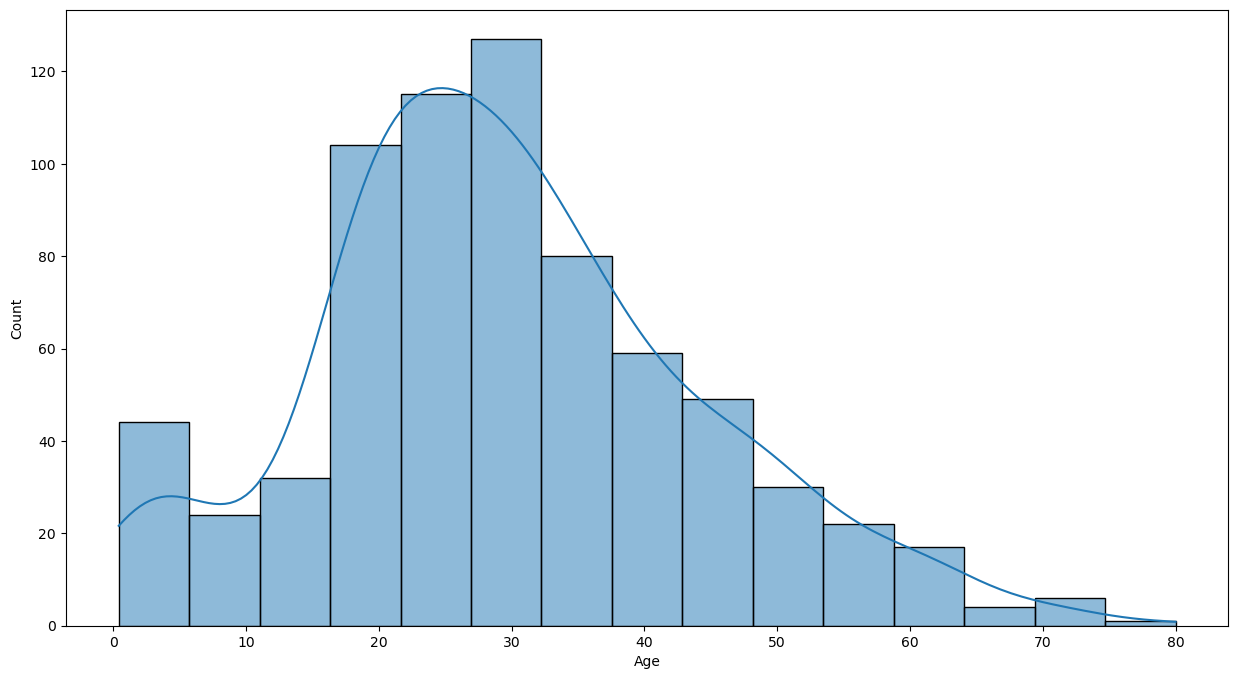

In [9]:
plt.figure(figsize=(15,8))
sns.histplot(data=data,x="Age",bins=15,kde=True)

- since "Age" is "right-skewed", using the mean might give us biased results by
filling in ages that are older tahn desired.To deal with this, we'll use the 
"median" to impute the missing values.

In [10]:
#median 
print(f"The median of Age is :{data['Age'].median(skipna=True)}")

The median of Age is :28.0


##### 1.2.Cabin-Missing values:

In [11]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((data['Cabin'].isnull().sum()/data.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


- 77% of records are missing, which means that imputing information and using this variable for prediction is probably "not wise".We'll ignore this variable in our model

##### 1.3 Embarked-Missing Values:

In [12]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((data['Embarked'].isnull().sum()/data.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


- There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.



unique values of Embarked:Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 for


<Axes: xlabel='Embarked', ylabel='count'>

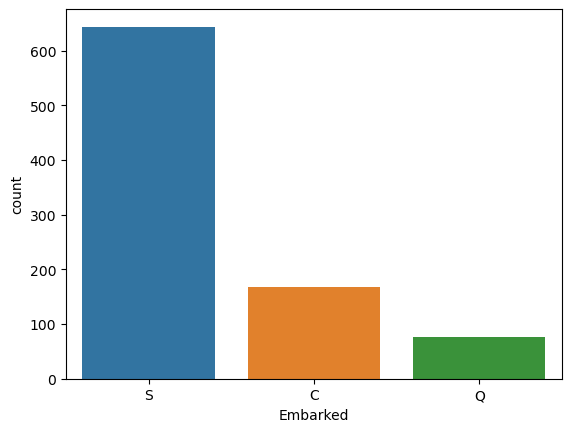

In [13]:
print(f"unique values of Embarked:{data['Embarked'].value_counts()} for")
sns.countplot(x="Embarked",data=data)

- the most common boarding port of emarkation is "S"

In [14]:
print('The most common boarding port of embarkation is %s.' %data['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


#### 1.4 Filling the NaN values with appropriate values:

In [15]:
train_data =data.copy()
train_data['Age'].fillna(data['Age'].median(skipna=True),inplace=True)
train_data['Embarked'].fillna(data['Embarked'].value_counts().idxmax(),inplace=True)
train_data.drop("Cabin",axis=1,inplace=True)

In [16]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

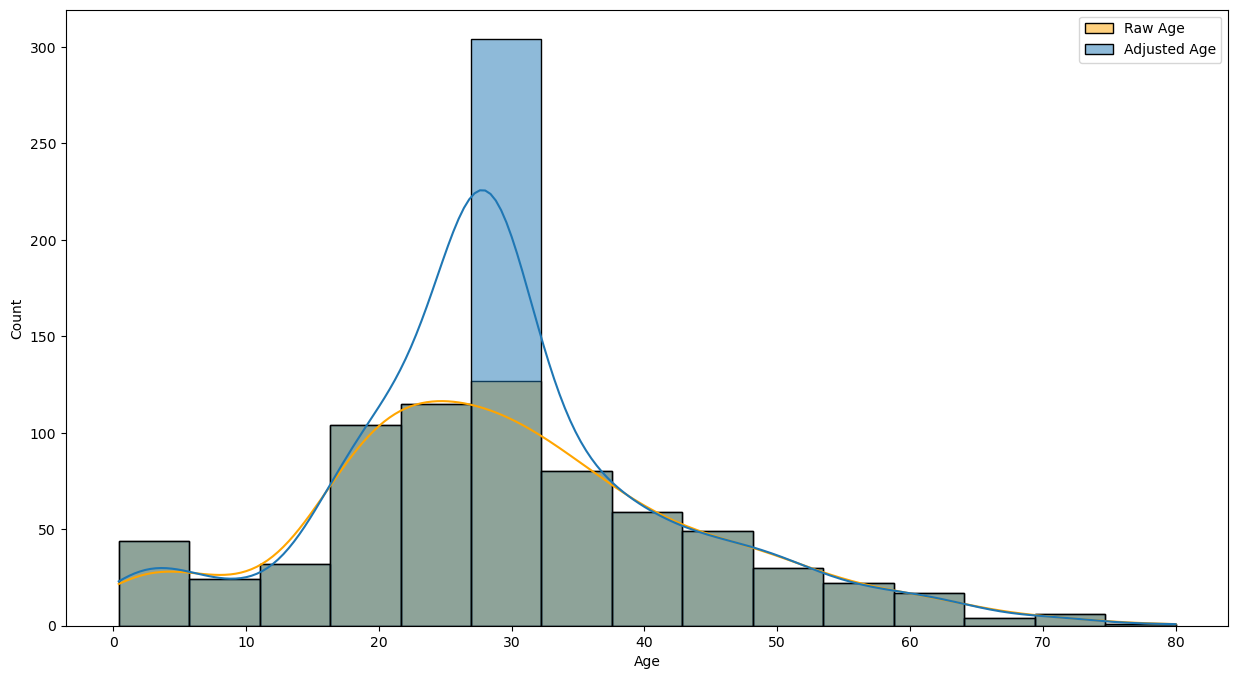

In [17]:
plt.figure(figsize=(15,8))
sns.histplot(data=data,x='Age',bins=15,kde=True,alpha=0.5,color='orange',label='Raw Age')
sns.histplot(data=train_data,x='Age',bins=15,kde=True,alpha=0.5,label='Adjusted Age')
plt.legend()


#### 2.1. Additional Variables¶
According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [18]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [19]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1


#### 3.1.Categorical Encoding:

In [20]:
training = pd.get_dummies(train_data,columns=['Pclass','Embarked','Sex'],dtype=int)
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


#### Apply Same for Test Data:

In [21]:
data_test= pd.read_csv('titanic_test.csv')

In [22]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
test_data = data_test.copy()

test_data['Age'].fillna(train_data['Age'].median(skipna=True),inplace=True)
test_data['Fare'].fillna(train_data['Fare'].median(skipna=True),inplace=True)

test_data.drop('Cabin',axis=1,inplace=True)

test_data['TravelAlone']=np.where((test_data['SibSp']+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp',axis=1,inplace=True)
test_data.drop('Parch',axis=1,inplace=True)

testing = pd.get_dummies(test_data,columns=['Pclass','Embarked','Sex'],dtype=int)
testing.drop('Sex_female',axis=1,inplace=True)
testing.drop('PassengerId',axis=1,inplace=True)
testing.drop('Name',axis=1,inplace=True)
testing.drop('Ticket',axis=1,inplace=True)

final_test =testing
final_test.head(3)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1


### 3. Exploratory Data Analysis:

#### 3.1 Exploration of Age:

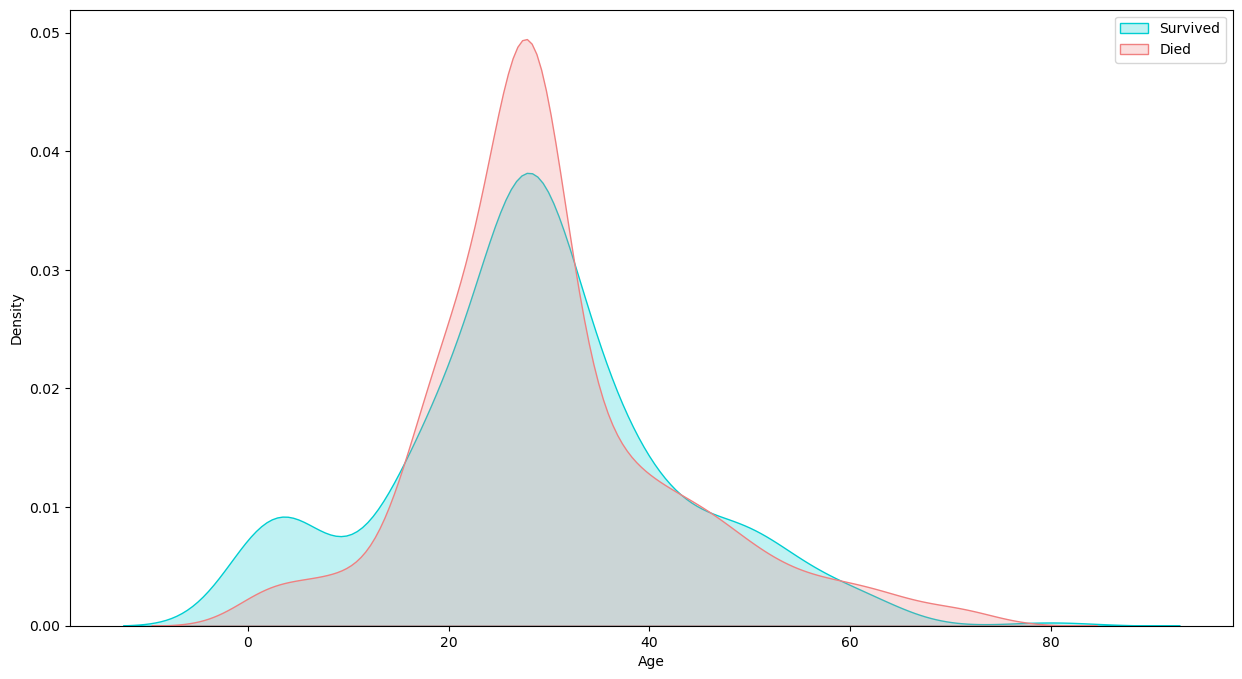

In [37]:
plt.figure(figsize=(15,8))
sns.kdeplot(final_train["Age"][final_train.Survived == 1],color='darkturquoise',fill=True)
sns.kdeplot(final_train['Age'][final_train.Survived == 0],color='lightcoral',fill=True)
plt.legend(['Survived','Died'])

##### The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

<Axes: xlabel='Age', ylabel='Survived'>

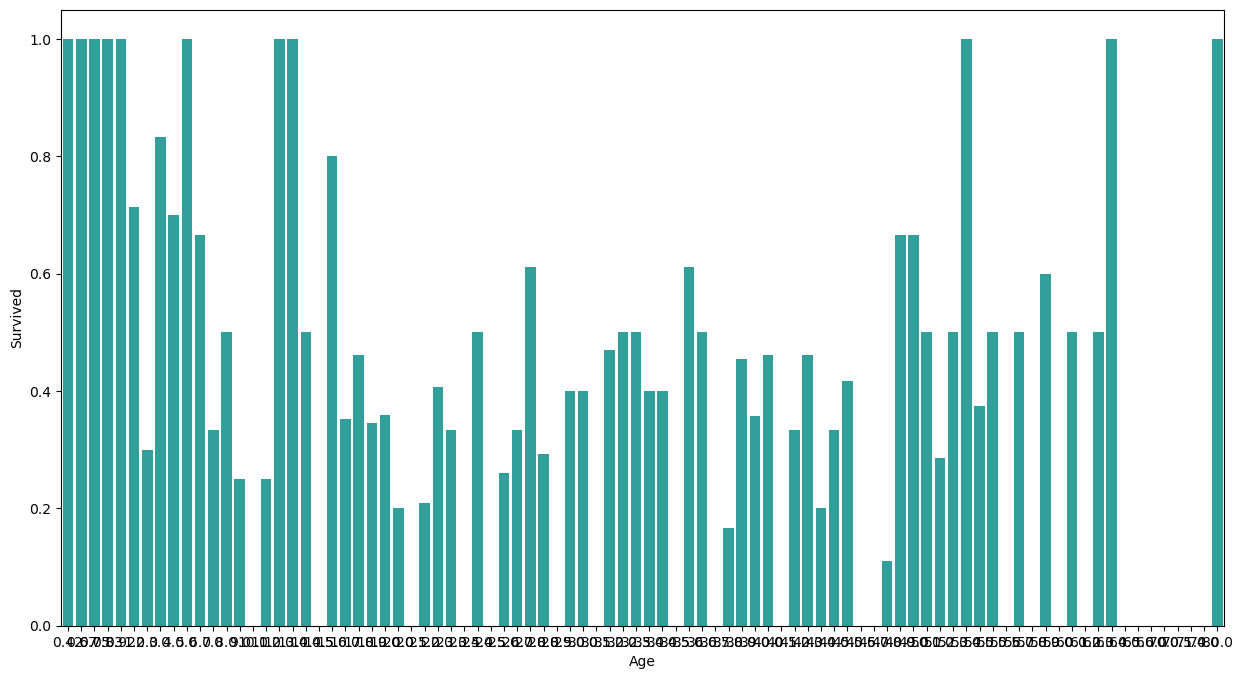

In [25]:
plt.figure(figsize=(15,8))
avg_survival_byage = final_train[['Age','Survived']].groupby(['Age'],as_index=False).mean()
sns.barplot(x="Age", y="Survived",data=avg_survival_byage,color='LightSeaGreen')

##### Considering the survival rate of passengers under 16, I'll also include another categorical variable in my dataset: "Minor"

In [26]:
final_train['IsMinor'] = np.where(final_train['Age']<16,1,0)

final_test['IsMinor'] = np.where(final_test['Age']<16,1,0)

#### 3.2. Exploration of Fare

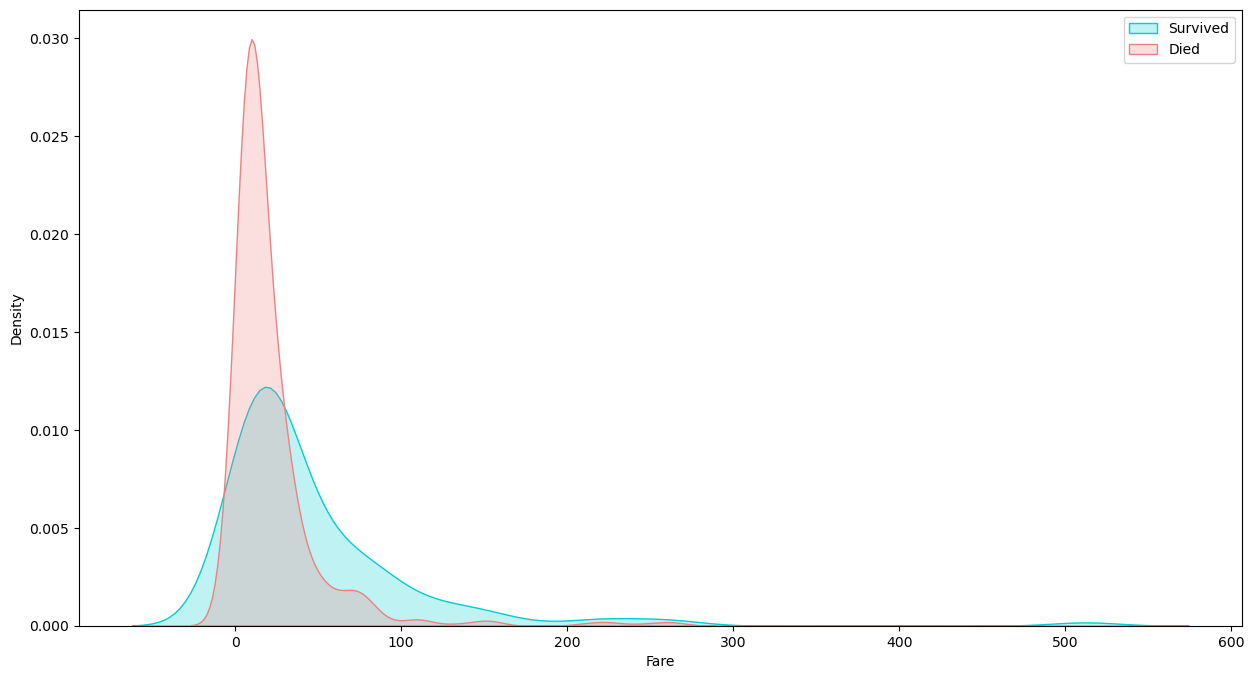

In [36]:
plt.figure(figsize=(15,8))
sns.kdeplot(final_train['Fare'][final_train.Survived == 1],color='darkturquoise',fill=True)
sns.kdeplot(final_train['Fare'][final_train.Survived == 0], color='lightcoral',fill=True)
plt.legend(['Survived','Died'])


##### As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next.

### 3.3 Exploration of Pasenger Class

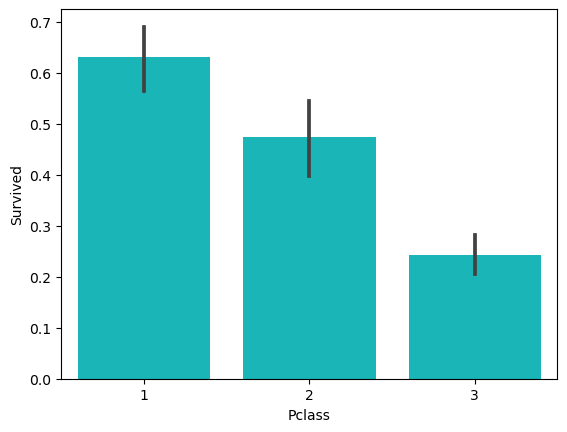

In [28]:
sns.barplot(x='Pclass',y='Survived',data=data,color='darkturquoise')
plt.show()

##### Unsurprsingly being a first class passenger was safest


#### 3.4 Exploration od Emarked Port

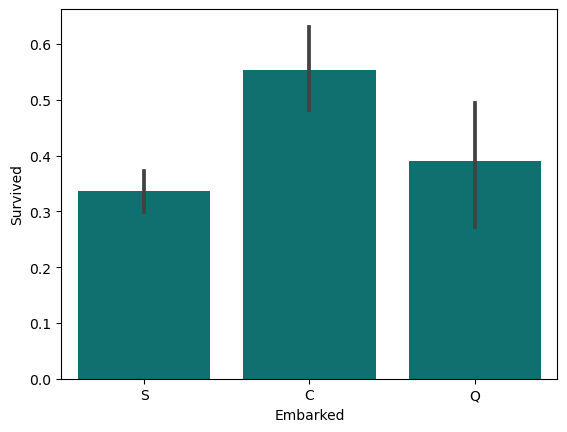

In [29]:
sns.barplot(x='Embarked',y='Survived',data=data,color='teal')
plt.show()
#Shorter whiskers mean less uncertainty (a more precise estimate).
# Longer whiskers mean more uncertainty (a less precise estimate).
# S    644
# C    168
# Q     77

##### Why Whiskers (Error Bars) are Important:
Confidence Intervals: Whiskers often represent confidence intervals, typically 95%, around the estimated survival rates. This means that if we were to repeat the sampling process many times, 95% of the calculated intervals would contain the true survival rate. The length of the whiskers gives us a visual sense of how much uncertainty there is in our estimate:

Shorter whiskers mean less uncertainty (a more precise estimate).
Longer whiskers mean more uncertainty (a less precise estimate).
Sample Size Differences: The size of the whiskers also reflects the number of observations (sample size) for each group:

A larger sample size (like Southampton) generally results in shorter whiskers because the estimate is more reliable.
A smaller sample size (like Queenstown) results in longer whiskers, indicating greater variability and less certainty in the estimate.
Overlapping Whiskers: When whiskers overlap, it indicates that the difference between the groups is not statistically significant. For example, if the whiskers for Queenstown and Southampton overlap, it suggests that their survival rates could be similar, and any apparent difference might be due to random chance rather than a real difference.

Visual Insight for Comparison: Whiskers allow you to visually compare not just the point estimates (the bar heights) but also the reliability of these estimates. Two bars may look different, but if their whiskers overlap significantly, we can't confidently say that one group's survival rate is truly higher or lower than the other’s.

Understanding Variation: They provide insight into the potential range of values the survival rate could take. If you're making decisions or interpreting the data, knowing the range of uncertainty is crucial.

Conclusion:
Whiskers provide additional context beyond the bar heights alone, helping us understand the reliability of the data, the sample size, and whether differences between groups are likely to be meaningful or just due to random variation. They are crucial for informed data analysis and interpretation, especially when dealing with real-world data where variability is common.

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).

It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

#### 3.5 Exploration of Travelling Alone vs With Family

<Axes: xlabel='TravelAlone', ylabel='Survived'>

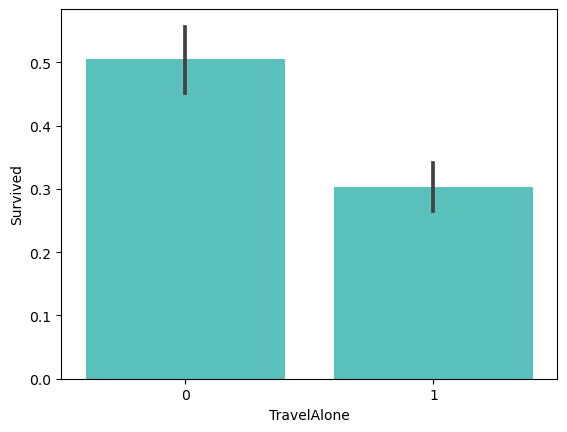

In [30]:
sns.barplot(x='TravelAlone',y='Survived',data=final_train,color='mediumturquoise')

Individuals travelling with family were more likely to die in the disaster than those with family abroad.Given the era, its likely that individuals travelling alone were more likely male.

#### 3.6 Exploration of Gender Variable

<Axes: xlabel='Sex', ylabel='Survived'>

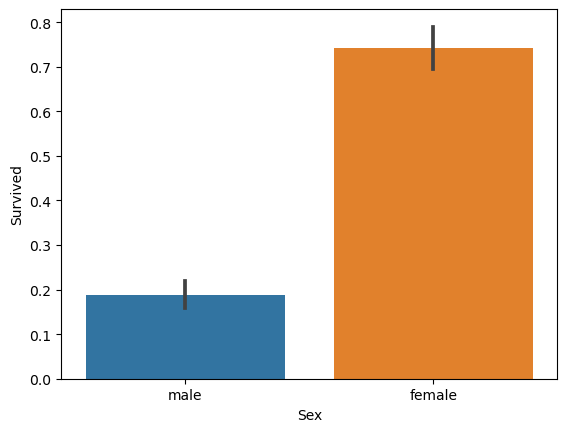

In [31]:
sns.barplot(x='Sex',y='Survived',data=train_data)

This is a very obvious difference. Clearly being female greatly increased your chance of survival

### 4. Logistic Regression and Results

#### 4.1 Feature selection

#### 4.1.1 Recursive feature elimination
Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols=['Age','Fare','TravelAlone','Pclass_1','Pclass_2','Embarked_C','Embarked_S','Sex_male','IsMinor']
X = final_train[cols]
y = final_train['Survived']

model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model,n_features_to_select=8)
rfe = rfe.fit(X,y)
print('Slected features:  %s' % list(X.columns[rfe.support_]))

Slected features:  ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


#### 4.1.2 Feature ranking with recursive elimination and cross-validation:
RFECV performs RFE in a cross-validation loop to find optimal number or the best number of features.Hereafter a recursive feature elimination appiled on logistic regressio with automatic tuning o fnumer of features selected with cross-validation

Optimial number of features: 8
[ True False  True  True  True  True  True  True  True]
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


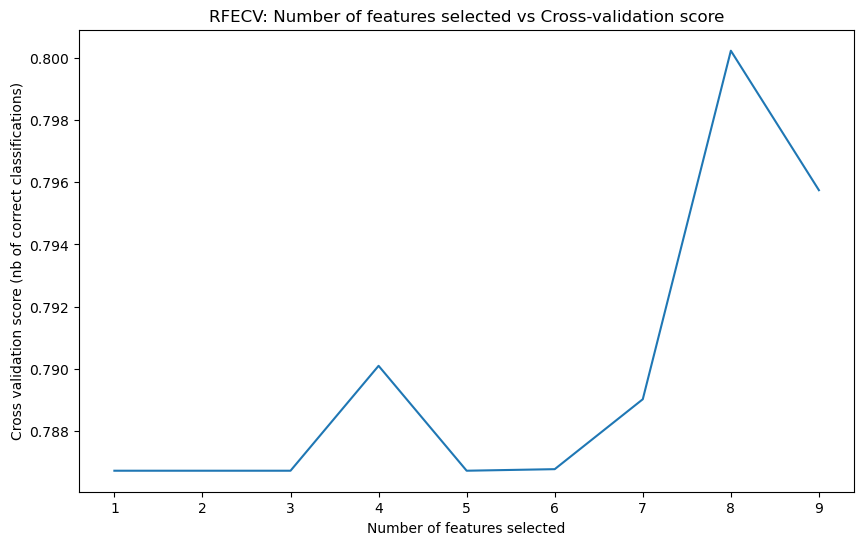

In [44]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=LogisticRegression(max_iter=1000),step=1,cv=10,scoring='accuracy')
rfecv.fit(X,y)

print("Optimial number of features: %d" % rfecv.n_features_)
print(rfecv.support_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

plt.figure(figsize=(10, 6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title('RFECV: Number of features selected vs Cross-validation score')
plt.show()

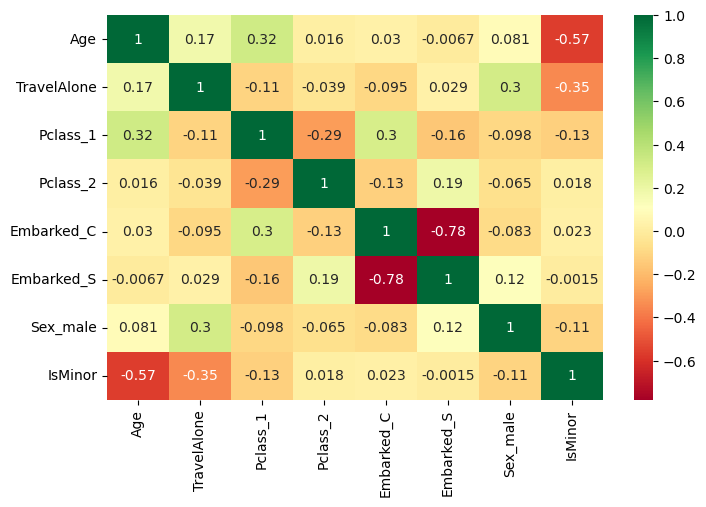

In [46]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8,5))
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')
plt.show()

### 4.2. Review of model evaluation procedures:
-Motivation: Need a way to choose between machine learning models
  - Goal is to estimate likely performance of a model on out-of-sample data.

-Initial idea: Train and test on the same data
- But, maximizing training accuracy rewards overly complex models which overfit the training data

-Alternative idea: Train/test split

- Split the dataset into two pieces, so that the model can be trained and tested on different data
- Testing accuracy is a better estimate than training accuracy of out-of-sample performance
- Problem with train/test split
    - It provides a high variance estimate since changing which observations happen to be 
    - in the testing set can significantly change testing accuracy
    - Testing accuracy can change a lot depending on a which observation happen to be in the testing set

##### 4.2.1 Model evaluation based o simple train/test split using train_test_split() function

Train/Test split results:
LogisticRegression accuracy is 0.804
LogisticRegression log_loss is 0.432
LogisticRegression auc is 0.873


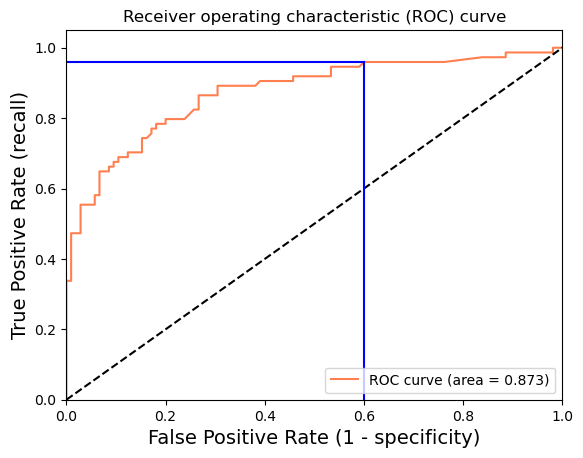

Using a threshold of 0.098 guarantees a sensitivity of 0.959 and a specificity of 0.400, i.e. a false positive rate of 60.00%.


In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve,auc,log_loss

X = final_train[Selected_features]
y = final_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]
[fpr, tpr, thr] = roc_curve(y_test,y_pred_proba)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

#### 4.2.2. Model evaluation based on K-fold cross-validation using cross_val_score() function

In [54]:
logreg = LogisticRegression(max_iter=1000)

scores_accuracy = cross_val_score(logreg,X,y,cv=10,scoring='accuracy')
scores_log_loss = cross_val_score(logreg,X,y,cv=10,scoring='neg_log_loss')
scores_auc = cross_val_score(logreg,X,y,cv=10,scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.800
LogisticRegression average log_loss is 0.454
LogisticRegression average auc is 0.850


#### 4.2.3 Model evaluation based on K-fold cross-validation using cross_validate() function

In [55]:
from sklearn.model_selection import cross_validate
scoring = {'accuracy':'accuracy','log_loss':'neg_log_loss','auc':'roc_auc'}

modelCV = LogisticRegression(max_iter=1000)

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.800 (+/-0.025)
LogisticRegression average log_loss: 0.454 (+/-0.040)
LogisticRegression average auc: 0.850 (+/-0.030)


##### what happens when wee add the feature "Fare":

In [57]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression(max_iter=1000)

results = cross_validate(modelCV, final_train[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.796 (+/-0.026)
LogisticRegression average log_loss: 0.455 (+/-0.039)
LogisticRegression average auc: 0.849 (+/-0.030)


We notice that the model is slightly deteriorated. The "Fare" variable does not carry any useful information. Its presence is just a noise for the logistic regression model.

### 4.3. GridSearchCV evaluating using multiple scorers simultaneously:

best params: LogisticRegression(C=1.80001, max_iter=1000)
best params: {'C': 1.80001}
best score: 0.8069662921348314


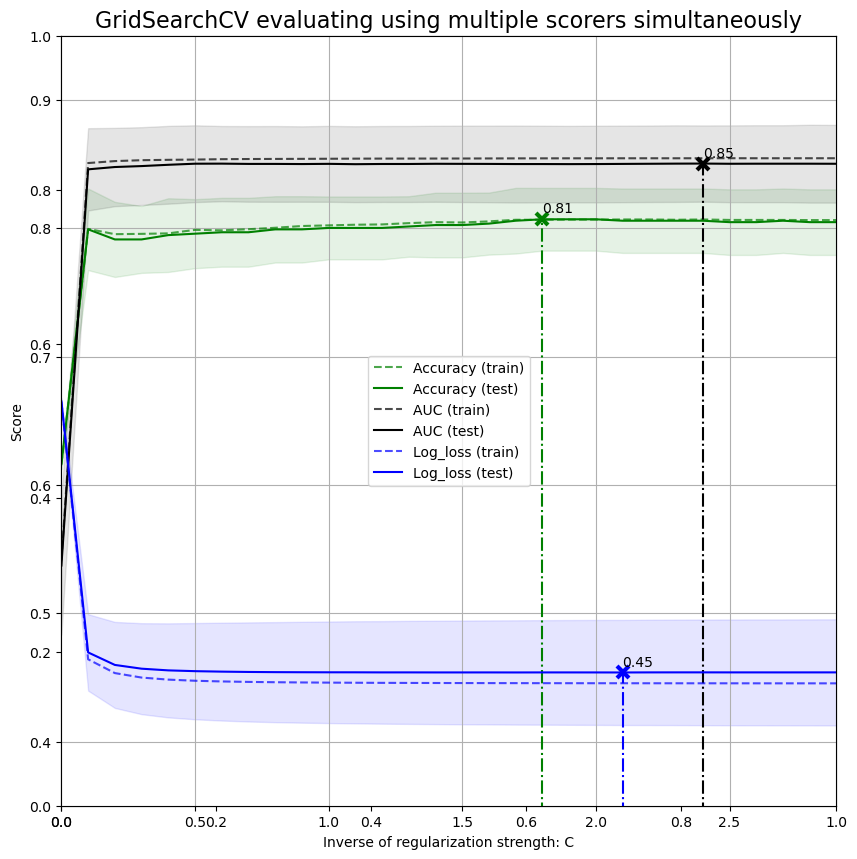

In [59]:
from sklearn.model_selection import GridSearchCV

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(max_iter = 1000), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

#### 4.4. GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously:
We can applied many tasks together for more in-depth evaluation like gridsearch using cross-validation based on k-folds repeated many times, that can be scaled or no with respect to many scorers and tunning on parameter for a given estimator!

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=5.20001, max_iter=1000))])
best params: {'clf__C': 5.20001}
best score: 0.8042621304375117


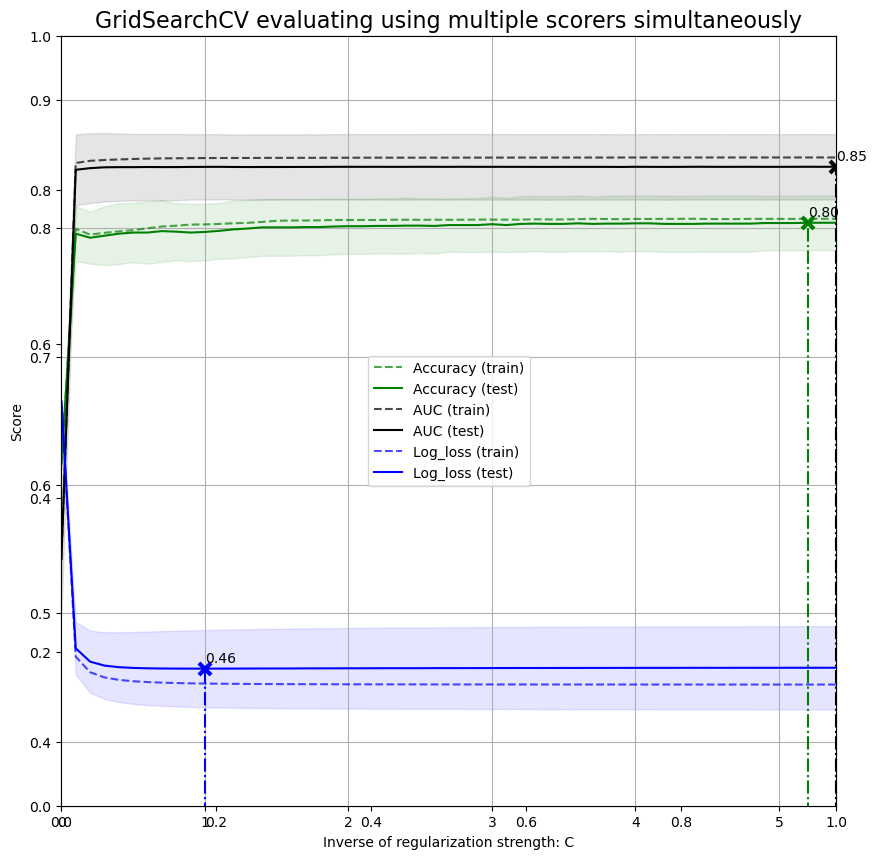

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression(max_iter=1000)

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [61]:
final_test['Survived'] = log_clf.predict(final_test[Selected_features])
final_test['PassengerId'] = test_data['PassengerId']

submission = final_test[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
